# Kelompok 3
### Citra Ratu Sona Sinaga
### Sella Septiana
### Wilma Nia Naida Sirait

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Extract Gambar

In [10]:
import os
for dirname, _, filenames in os.walk('//content/drive/MyDrive/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

//content/drive/MyDrive/Dataset/my_model.h5
//content/drive/MyDrive/Dataset/test/Mangga Apel/6.jpg
//content/drive/MyDrive/Dataset/test/Mangga Apel/5.jpg
//content/drive/MyDrive/Dataset/test/Mangga Apel/4.jpg
//content/drive/MyDrive/Dataset/test/Mangga Apel/2.jpg
//content/drive/MyDrive/Dataset/test/Mangga Apel/3.jpg
//content/drive/MyDrive/Dataset/test/Mangga Apel/19.jpg
//content/drive/MyDrive/Dataset/test/Mangga Apel/20.webp
//content/drive/MyDrive/Dataset/test/Mangga Apel/18.jfif
//content/drive/MyDrive/Dataset/test/Mangga Apel/17.jpg
//content/drive/MyDrive/Dataset/test/Mangga Apel/16.webp
//content/drive/MyDrive/Dataset/test/Mangga Apel/4.webp
//content/drive/MyDrive/Dataset/test/Mangga Apel/15.jpg
//content/drive/MyDrive/Dataset/test/Mangga Apel/14.webp
//content/drive/MyDrive/Dataset/test/Mangga Apel/11.jpg
//content/drive/MyDrive/Dataset/test/Mangga Apel/1.jpg
//content/drive/MyDrive/Dataset/test/Mangga Apel/10.jpg
//content/drive/MyDrive/Dataset/test/Mangga Apel/13.jpg
//cont

In [11]:
import os
base_dir = '/content/drive/MyDrive/Dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')
# Directory with our training cat/dog pictures
train_apel_dir = os.path.join(train_dir, 'Mangga Apel')
train_manis_dir = os.path.join(train_dir, 'Mangga Harum Manis')
train_kweni_dir = os.path.join(train_dir, 'Mangga Kweni')
train_madu_dir = os.path.join(train_dir, 'Mangga Madu')

# Directory with our validation cat/dog pictures
validation_apel_dir = os.path.join(validation_dir, 'Mangga Apel')
validation_manis_dir = os.path.join(validation_dir, 'Mangga Harum Manis')
validation_kweni_dir = os.path.join(validation_dir, 'Mangga Kweni')
validation_madu_dir = os.path.join(validation_dir, 'Mangga Madu')

# Generate Image dan Augmentasi Image

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=20,
horizontal_flip=True,
shear_range = 0.2,
fill_mode = 'nearest')

In [14]:
test_datagen = ImageDataGenerator(
rescale=1./255)

In [15]:
train_apel_fnames = os.listdir(train_apel_dir)
train_manis_fnames = os.listdir(train_manis_dir)
train_kweni_fnames = os.listdir(train_kweni_dir)
train_madu_fnames = os.listdir(train_madu_dir)

print(train_apel_fnames[:10])
print(train_manis_fnames[:10])
print(train_kweni_fnames[:10])
print(train_madu_fnames[:10])

['9.jpg', '8.jpg', '4.jpg', '6.jpg', '4.webp', '5.jpg', '3.jpg', '20.webp', '2.jpg', '19.jpg']
['10.jfif', '11.jfif', '12.jfif', '1.webp', '14.jpg', '13.jfif', '9.jfif', '8.jfif', '3.jfif', '4.jfif']
['9.jpg', '8.jpg', '7.jpg', '6.jpg', '4.jpg', '5.jpg', '13.jpg', '12.jpg', '15.jpg', '1.jpg']
['Mangga Madu']


In [16]:
test_datagen = ImageDataGenerator(
rescale=1./255)

In [19]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration

nrows = 6
ncols = 4

pic_index = 0 # Index for iterating over images

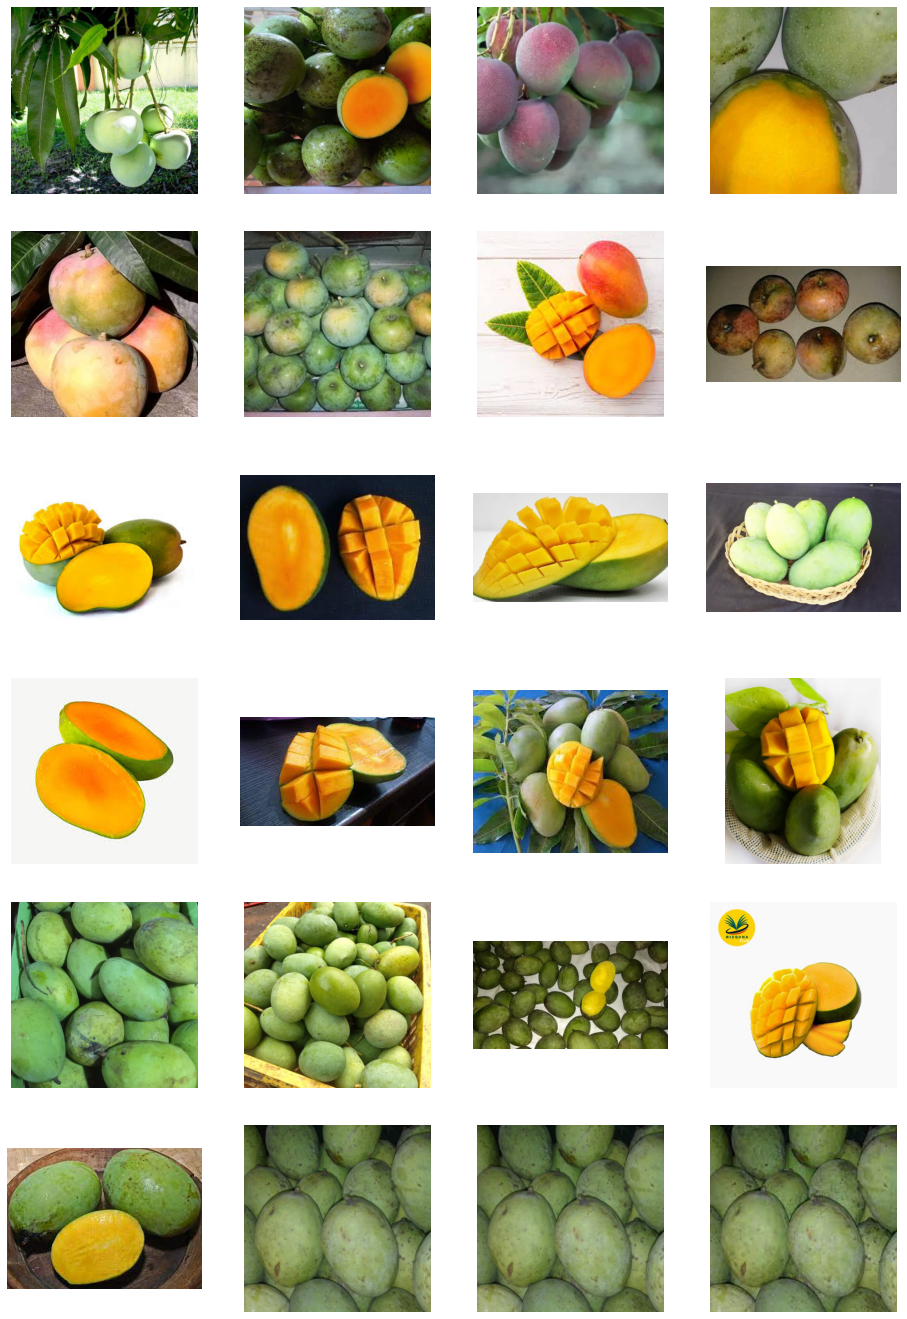

In [21]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_mapel_pix = [os.path.join(train_apel_dir, fname) 
                for fname in train_apel_fnames[ pic_index-8:pic_index] 
               ]

next_mharummanis_pix = [os.path.join(train_manis_dir, fname) 
                for fname in train_manis_fnames[ pic_index-8:pic_index]
               ]

next_mkweni_pix = [os.path.join(train_kweni_dir, fname) 
                for fname in train_kweni_fnames[ pic_index-8:pic_index]
               ]
next_mmadu_pix = [os.path.join(train_madu_dir, fname) 
                for fname in train_madu_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_mapel_pix+next_mharummanis_pix+next_mkweni_pix+next_mmadu_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Data train dan test

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4,
    # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
    class_mode='binary')

Found 51 images belonging to 4 classes.


In [23]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data latih
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4,
    # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
    class_mode='binary')

Found 51 images belonging to 4 classes.


## Pembuatan Model CNN

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## Melihat Summary Model

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Compile Model

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

## Fit Model

In [27]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              validation_steps = 3,
                              verbose=2)

Epoch 1/50
13/13 - 20s - loss: -3.1148e+02 - accuracy: 0.0784 - val_loss: -2.0999e+03 - val_accuracy: 0.0000e+00 - 20s/epoch - 2s/step
Epoch 2/50
13/13 - 5s - loss: -1.8908e+04 - accuracy: 0.0784 - val_loss: -4.3895e+04 - val_accuracy: 0.0833 - 5s/epoch - 386ms/step
Epoch 3/50
13/13 - 4s - loss: -2.8172e+05 - accuracy: 0.0784 - val_loss: -6.8515e+05 - val_accuracy: 0.0833 - 4s/epoch - 335ms/step
Epoch 4/50
13/13 - 5s - loss: -3.0446e+06 - accuracy: 0.0784 - val_loss: -6.1323e+06 - val_accuracy: 0.0833 - 5s/epoch - 358ms/step
Epoch 5/50
13/13 - 4s - loss: -1.7211e+07 - accuracy: 0.0784 - val_loss: -3.5253e+07 - val_accuracy: 0.0000e+00 - 4s/epoch - 345ms/step
Epoch 6/50
13/13 - 4s - loss: -1.2609e+08 - accuracy: 0.0784 - val_loss: -3.1929e+08 - val_accuracy: 0.0000e+00 - 4s/epoch - 319ms/step
Epoch 7/50
13/13 - 4s - loss: -4.4997e+08 - accuracy: 0.0784 - val_loss: -1.2965e+09 - val_accuracy: 0.0833 - 4s/epoch - 319ms/step
Epoch 8/50
13/13 - 4s - loss: -1.3584e+09 - accuracy: 0.0784 - va

## Testing Upload Image

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


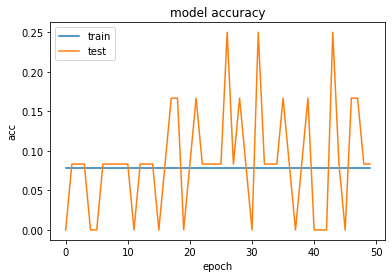

In [28]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

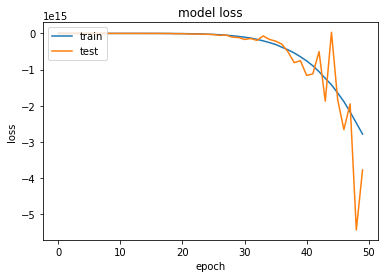

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Testing Upload Image (2)

Saving 19.webp to 19.webp
19.webp
mangga harum manis


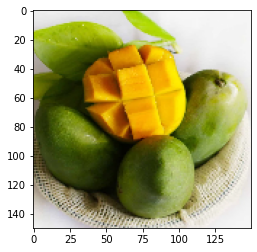

In [47]:
uploaded = files.upload()

for fn in uploaded.keys():
  #predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
    print('mangga apel')
  elif classes==1:
    print('mangga harum manis')
  elif clasess==2:
    print('mangga kweni')
  else:
    print('mangga madu')